<a href="https://colab.research.google.com/github/Priya1Projects/MSBA_DataScience/blob/main/Logistic_and_NN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

To load data from your Google drive, first you need to mount Google drive. First, run the code below. Second, in order to get the authorization code, you should click on the link, choose your Google account, click on 'allow' and copy the code and paste it in the box below and press Enter. Once done it will show you "Mounted at gdrive". You know the Google drive is mounted once you see your folders on the left panel.







In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
# tensorflow 1 is already installed by default
# !pip install tensorflow==2
# go to runtime, rsetart runtime!
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 5.4 MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
# check the version
tf.__version__

'2.8.0'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Data

##Data Loading

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/new_train.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [ ]:
pd.DataFrame(data['y']).value_counts()

y  
no     29238
yes     3712
dtype: int64

In [ ]:
data_yes = data.loc[(data['y'] == 'yes')]
data_no = data.loc[(data['y'] == 'no')]

data_balanced = data_no.sample(n=3712)
data_balanced = data_balanced.append(data_yes)

pd.DataFrame(data_balanced['y']).value_counts()

y  
no     3712
yes    3712
dtype: int64

In [ ]:
# Split x and y
x = data_balanced.iloc[:,0:15]
y = data_balanced.iloc[:,15]
x.shape

(7424, 15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def normalize(data):
  # Numeric Data Normalization
  index=[0,10,11,12,13]
  scaler = MinMaxScaler(feature_range=(0, 1))
  data[data.columns[index]] = scaler.fit_transform(data[data.columns[index]])
  return data

In [ ]:
from sklearn.model_selection import train_test_split
x= normalize(x)
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
25507,0.271605,management,single,university.degree,no,no,no,cellular,apr,fri,0.065316,0.000000,1.000000,0.000000,nonexistent
7671,0.148148,technician,single,university.degree,no,no,yes,cellular,apr,mon,0.051967,0.000000,1.000000,0.000000,nonexistent
17387,0.283951,admin.,married,basic.9y,no,yes,no,cellular,nov,wed,0.043385,0.024390,1.000000,0.000000,nonexistent
15311,0.296296,technician,divorced,university.degree,no,yes,yes,cellular,aug,fri,0.026698,0.024390,1.000000,0.000000,nonexistent
26440,0.148148,technician,single,high.school,no,yes,no,cellular,aug,tue,0.030036,0.121951,1.000000,0.000000,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32917,0.617284,retired,married,professional.course,no,yes,yes,cellular,aug,mon,0.043385,0.000000,1.000000,0.000000,nonexistent
32918,0.049383,student,single,high.school,no,no,no,cellular,jun,thu,0.094398,0.000000,1.000000,0.000000,nonexistent
32922,0.271605,technician,single,professional.course,unknown,no,no,telephone,jun,mon,0.102026,0.073171,1.000000,0.000000,nonexistent
32937,0.148148,technician,single,university.degree,no,yes,yes,cellular,may,fri,0.103218,0.048780,1.000000,0.000000,nonexistent


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)   # Split 80-20

In [ ]:
print("train X shape: ", x_train.shape) # X_train: numpy array with shape: (num_samples_train, num_features)
print("train y shape: ", y_train.shape) # y_train: numpy array with shape: (num_samples_train,) 
print("test X shape: ", x_test.shape)   # X_test: numpy array with shape: (num_samples_test, num_features)
print("test y shape: ", y_test.shape)   # y_test: numpy array with shape: (num_samples_test,)

train X shape:  (5939, 15)
train y shape:  (5939,)
test X shape:  (1485, 15)
test y shape:  (1485,)


In [ ]:
#Display y label
x_train.iloc[0,0]

0.2222222222222222

In [ ]:
pd.DataFrame(y_test).value_counts()
x_train.iloc[:, [1,2,3,4,5,6,7,8,9]]

,job,marital,education,default,housing,loan,contact,month,day_of_week
24141,blue-collar,married,basic.9y,no,no,no,telephone,jul,mon
11642,technician,married,basic.6y,unknown,no,no,telephone,jun,mon
11694,services,married,high.school,unknown,yes,no,telephone,may,tue
7707,services,divorced,university.degree,no,unknown,unknown,cellular,nov,tue
14644,services,married,high.school,no,no,yes,cellular,may,fri
...,...,...,...,...,...,...,...,...,...
13240,blue-collar,married,basic.4y,no,no,no,telephone,sep,wed
13527,blue-collar,divorced,basic.9y,no,yes,no,cellular,jul,wed
14955,technician,married,university.degree,no,no,no,cellular,aug,wed
3424,technician,divorced,high.school,no,no,no,cellular,nov,fri


##Data Preparation

In [ ]:
# prepare input data
def prepare_inputs(x, X_train, X_test):
    oe = OrdinalEncoder()
    #oe.fit(x)    
    X_train_enc = oe.fit_transform(X_train)
    print(oe.categories_)
    X_test_enc = oe.fit_transform(X_test)
    return X_train_enc,  X_test_enc

In [ ]:
# prepare target
def prepare_targets(y, y_train, y_test):
    le = LabelEncoder()
    #le.fit(y)
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.fit_transform(y_test)
    return y_train_enc,  y_test_enc

In [ ]:
# prepare input data
#x_train, x_test = prepare_inputs(x, x_train, x_test)

# prepare output data
y_train, y_test = prepare_targets(y, y_train, y_test)

#x_train


In [ ]:
# Normalize categorical values
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['job','marital',	'education',	'default',	'housing',	'loan',	'contact',	'month',	'day_of_week','poutcome'])
x_train= encoder.fit_transform(x_train)
x_test= encoder.fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
24141,0.222222,1,1,1,1,1,1,1,1,1,0.322288,0.04878,1.000000,0.000000,1
11642,0.209877,2,1,2,2,1,1,1,2,1,0.112992,0.02439,1.000000,0.000000,1
11694,0.271605,3,1,3,2,2,1,1,3,2,0.217878,0.00000,1.000000,0.000000,1
7707,0.308642,3,2,4,1,3,2,2,4,2,0.061502,0.00000,1.000000,0.166667,2
14644,0.432099,3,1,3,1,1,3,2,3,3,0.008105,0.02439,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,0.185185,1,1,5,1,1,1,1,9,4,0.143504,0.04878,0.003003,0.666667,3
13527,0.197531,1,2,1,1,2,1,2,1,4,0.172825,0.02439,1.000000,0.000000,1
14955,0.370370,2,1,4,1,1,1,2,8,4,0.390465,0.02439,1.000000,0.000000,1
3424,0.185185,2,2,3,1,1,1,2,4,3,0.010965,0.00000,1.000000,0.000000,1


In [ ]:
np.min(np.min(x_train))

0.0

In [ ]:
#y_train = y_train.reshape((len(y_train),1)).T
#y_test = y_test.reshape((len(y_test),1)).T

In [ ]:
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

x_train shape: (5939, 15)
y_train shape: (5939,)
x_test shape: (1485, 15)
y_test shape: (1485,)


In [ ]:
x_test1 = x_test.T
x_train1 = x_train.T

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)


In [ ]:
x_train

array([[0.22222222, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.20987654, 2.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.27160493, 3.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.37037036, 2.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.18518518, 2.        , 2.        , ..., 1.        , 0.        ,
        1.        ],
       [0.43209878, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ]], dtype=float32)

#Logistic Model

## Parameters
Defining Parameters 

In [ ]:
num_classes = 2 # 0 or 1

num_features = 15 # 15 variables

learning_rate = 0.01

training_steps = 1000

batch_size = 1000

display_step = 500

In [ ]:
# Use tf.data API to shuffle and batch data.

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


In [ ]:
# Initial weights and biases
# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.

W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.

b = tf.Variable(tf.zeros([num_classes]), name="bias")

In [ ]:
W

<tf.Variable 'weight:0' shape=(15, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

##Build Model (Logistic)

###Define Functions

In [ ]:
# Logistic regression (Wx + b).

def logistic_regression(x):

    # Apply softmax to normalize the logits to a probability distribution.

    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.

def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.

    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.

def accuracy(y_pred, y_true):

# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.

optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process. 

def run_optimization(x, y):

# Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.

    gradients = g.gradient(loss, [W, b])

  

    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients, [W, b]))

###Model with Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

In [ ]:
confusion_matrix(y_train, model.predict(x_train))

array([[2511,  447],
       [ 693, 2288]])

###Model with batch

In [ ]:
#Model

def model(learning_rate=0.01):

  learning_rate = learning_rate

  for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

      # Run the optimization to update W and b values.

      run_optimization(batch_x, batch_y)

    

      if step % display_step == 0:

          pred = logistic_regression(batch_x)

          loss = cross_entropy(pred, batch_y)

          acc = accuracy(pred, batch_y)

          print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


In [ ]:
model(learning_rate=0.1)
model(0.01)
model(0.005)
model(0.0005)
model(0.0001)

step: 500, loss: 9884.998047, accuracy: 0.523000
step: 1000, loss: 10506.695312, accuracy: 0.493000
step: 500, loss: 10672.482422, accuracy: 0.485000
step: 1000, loss: 10651.759766, accuracy: 0.486000
step: 500, loss: 10112.954102, accuracy: 0.512000
step: 1000, loss: 10237.293945, accuracy: 0.506000
step: 500, loss: 10734.651367, accuracy: 0.482000
step: 1000, loss: 10195.847656, accuracy: 0.508000
step: 500, loss: 10796.822266, accuracy: 0.479000
step: 1000, loss: 10776.098633, accuracy: 0.480000


###TensorFlow logistic sequential Model

In [ ]:

model = Sequential([
                    Dense(1, activation='sigmoid',input_shape = (15,)),
])


In [ ]:
# compile the model

model.compile(optimizer = tf.optimizers.SGD(learning_rate = 0.003),
              loss='bce', 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Calling model.fit returns a TensorFlow history object. This object contains a record of the progress of the network during training in terms of the loss and the metrics that we defined when we compiled the model.

In [ ]:
# fit the model
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 0.8039 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.7885 - val_sparse_categorical_accuracy: 0.4976 - 713ms/epoch - 10ms/step
Epoch 2/20
70/70 - 0s - loss: 0.7631 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.7662 - val_sparse_categorical_accuracy: 0.4976 - 116ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.7428 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.7487 - val_sparse_categorical_accuracy: 0.4976 - 119ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.7269 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.7332 - val_sparse_categorical_accuracy: 0.4976 - 168ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.7139 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.7214 - val_sparse_categorical_accuracy: 0.4976 - 133ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.7038 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.7120 - val_sparse_categorical_accuracy: 0.4976 - 163ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.6

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Train Metrics
Y_prediction = pd.DataFrame()
Y_prediciton = pred = model.predict(x_train)
for i in range(pred.shape[0]):  
    Y_prediction[0,i] = np.where(pred[i] > 0.5, 1, 0)

Y_prediction = Y_prediction.T
print('Train Confusion Matrix:\n',confusion_matrix(Y_prediction,y_train))
print('Train Classification Report:\n',classification_report(Y_prediction,y_train))


In [ ]:
# Test Metrics
Y_prediction = pd.DataFrame()
Y_prediciton = pred = model.predict(x_test)
for i in range(pred.shape[0]):  
    Y_prediction[0,i] = np.where(pred[i] > 0.5, 1, 0)

Y_prediction = Y_prediction.T
print('Test Confusion Matrix:\n',confusion_matrix(Y_prediction,y_test))
print('Test Classification Report:\n',classification_report(Y_prediction,y_test))

#NN Models

## Shallow single layer Relu

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,))
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 4.5751 - sparse_categorical_accuracy: 0.1718 - val_loss: 0.9630 - val_sparse_categorical_accuracy: 0.4889 - 1s/epoch - 16ms/step
Epoch 2/20
70/70 - 0s - loss: 0.7610 - sparse_categorical_accuracy: 0.4836 - val_loss: 0.7384 - val_sparse_categorical_accuracy: 0.4956 - 286ms/epoch - 4ms/step
Epoch 3/20
70/70 - 0s - loss: 0.7008 - sparse_categorical_accuracy: 0.4879 - val_loss: 0.7106 - val_sparse_categorical_accuracy: 0.4976 - 292ms/epoch - 4ms/step
Epoch 4/20
70/70 - 0s - loss: 0.6942 - sparse_categorical_accuracy: 0.4919 - val_loss: 0.6965 - val_sparse_categorical_accuracy: 0.5104 - 282ms/epoch - 4ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6931 - sparse_categorical_accuracy: 0.4910 - val_loss: 0.6958 - val_sparse_categorical_accuracy: 0.5071 - 242ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6928 - sparse_categorical_accuracy: 0.4903 - val_loss: 0.6953 - val_sparse_categorical_accuracy: 0.5010 - 237ms/epoch - 3ms/step
Epoch 7/20
70/70 - 0s - loss: 0.6926

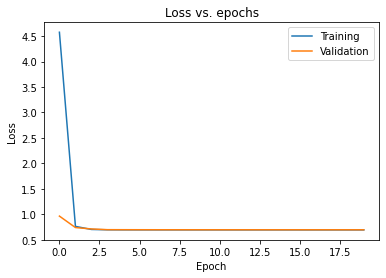

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.6923 - sparse_categorical_accuracy: 0.4871


0.48711904883384705

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.6940 - sparse_categorical_accuracy: 0.4983


0.4983164966106415

## Shallow single layer Sigmoid

In [ ]:
model = Sequential([
                    Dense(16, activation = 'sigmoid', input_shape = (15,))
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 0s - loss: 2.1415 - sparse_categorical_accuracy: 0.3217 - val_loss: 0.9960 - val_sparse_categorical_accuracy: 0.5340 - 494ms/epoch - 7ms/step
Epoch 2/20
70/70 - 0s - loss: 0.8823 - sparse_categorical_accuracy: 0.5550 - val_loss: 0.8345 - val_sparse_categorical_accuracy: 0.5576 - 161ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.7538 - sparse_categorical_accuracy: 0.5799 - val_loss: 0.7237 - val_sparse_categorical_accuracy: 0.5724 - 166ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.6767 - sparse_categorical_accuracy: 0.6066 - val_loss: 0.6598 - val_sparse_categorical_accuracy: 0.6135 - 144ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6294 - sparse_categorical_accuracy: 0.6466 - val_loss: 0.6221 - val_sparse_categorical_accuracy: 0.6512 - 133ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6027 - sparse_categorical_accuracy: 0.6695 - val_loss: 0.6023 - val_sparse_categorical_accuracy: 0.6781 - 166ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.58

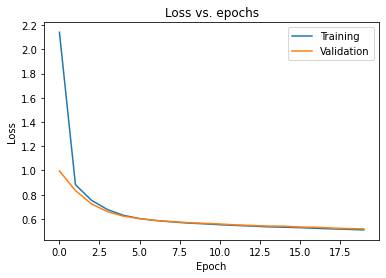

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.5105 - sparse_categorical_accuracy: 0.7607


0.7607341408729553

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.5152 - sparse_categorical_accuracy: 0.7630


0.7629629373550415

## 2 layer NN

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(50, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 1.7663 - sparse_categorical_accuracy: 0.3981 - val_loss: 0.7259 - val_sparse_categorical_accuracy: 0.5286 - 609ms/epoch - 9ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6982 - sparse_categorical_accuracy: 0.5528 - val_loss: 0.6886 - val_sparse_categorical_accuracy: 0.5603 - 186ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.6712 - sparse_categorical_accuracy: 0.5905 - val_loss: 0.6640 - val_sparse_categorical_accuracy: 0.6141 - 134ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.6425 - sparse_categorical_accuracy: 0.6257 - val_loss: 0.6291 - val_sparse_categorical_accuracy: 0.6485 - 179ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6043 - sparse_categorical_accuracy: 0.6664 - val_loss: 0.5889 - val_sparse_categorical_accuracy: 0.6882 - 175ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5695 - sparse_categorical_accuracy: 0.6974 - val_loss: 0.5830 - val_sparse_categorical_accuracy: 0.6882 - 143ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.55

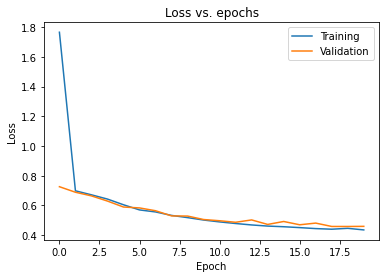

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4392 - sparse_categorical_accuracy: 0.7976


0.7976090312004089

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4287 - sparse_categorical_accuracy: 0.8040


0.8040404319763184

## 3 layer NN (Found to be best)

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid'),
                    Dense(1, activation = 'sigmoid') ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 1.5437 - sparse_categorical_accuracy: 0.4767 - val_loss: 0.6646 - val_sparse_categorical_accuracy: 0.6040 - 690ms/epoch - 10ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6438 - sparse_categorical_accuracy: 0.6154 - val_loss: 0.6245 - val_sparse_categorical_accuracy: 0.6316 - 176ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.6061 - sparse_categorical_accuracy: 0.6471 - val_loss: 0.6303 - val_sparse_categorical_accuracy: 0.6229 - 179ms/epoch - 3ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5865 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.6097 - val_sparse_categorical_accuracy: 0.6269 - 182ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5691 - sparse_categorical_accuracy: 0.6857 - val_loss: 0.5514 - val_sparse_categorical_accuracy: 0.7212 - 190ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5364 - sparse_categorical_accuracy: 0.7194 - val_loss: 0.5340 - val_sparse_categorical_accuracy: 0.7199 - 185ms/epoch - 3ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5

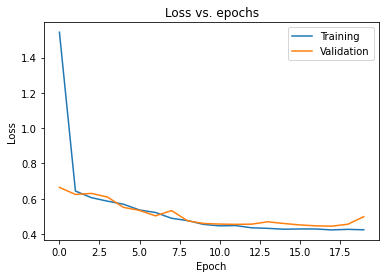

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4788 - sparse_categorical_accuracy: 0.7779


0.7779087424278259

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4661 - sparse_categorical_accuracy: 0.7865


0.7865319848060608

## 3 Layer NN

In [ ]:
model = Sequential([
                    Dense(64, activation = 'relu', input_shape = (15,)),
                    Dense(64, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 0.9133 - sparse_categorical_accuracy: 0.5732 - val_loss: 0.6249 - val_sparse_categorical_accuracy: 0.6444 - 655ms/epoch - 9ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6097 - sparse_categorical_accuracy: 0.6533 - val_loss: 0.5890 - val_sparse_categorical_accuracy: 0.6620 - 204ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5520 - sparse_categorical_accuracy: 0.7106 - val_loss: 0.5946 - val_sparse_categorical_accuracy: 0.6795 - 151ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5008 - sparse_categorical_accuracy: 0.7564 - val_loss: 0.4865 - val_sparse_categorical_accuracy: 0.7764 - 193ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.4606 - sparse_categorical_accuracy: 0.7820 - val_loss: 0.4651 - val_sparse_categorical_accuracy: 0.7771 - 193ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.4502 - sparse_categorical_accuracy: 0.7847 - val_loss: 0.5705 - val_sparse_categorical_accuracy: 0.7199 - 194ms/epoch - 3ms/step
Epoch 7/20
70/70 - 0s - loss: 0.44

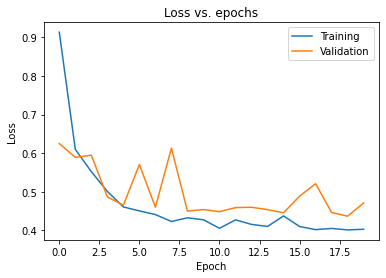

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4265 - sparse_categorical_accuracy: 0.8048


0.8048493266105652

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4233 - sparse_categorical_accuracy: 0.8007


0.8006734251976013

# Optimization 

## Best 3-layer Adam's

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 1.5441 - sparse_categorical_accuracy: 0.4708 - val_loss: 0.6605 - val_sparse_categorical_accuracy: 0.5939 - 630ms/epoch - 9ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6478 - sparse_categorical_accuracy: 0.6176 - val_loss: 0.6258 - val_sparse_categorical_accuracy: 0.6451 - 143ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.6091 - sparse_categorical_accuracy: 0.6545 - val_loss: 0.5983 - val_sparse_categorical_accuracy: 0.6727 - 186ms/epoch - 3ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5889 - sparse_categorical_accuracy: 0.6740 - val_loss: 0.5677 - val_sparse_categorical_accuracy: 0.7071 - 190ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5522 - sparse_categorical_accuracy: 0.7101 - val_loss: 0.5445 - val_sparse_categorical_accuracy: 0.7333 - 157ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5255 - sparse_categorical_accuracy: 0.7375 - val_loss: 0.5342 - val_sparse_categorical_accuracy: 0.7064 - 174ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.50

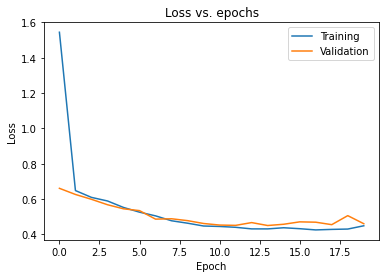

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4366 - sparse_categorical_accuracy: 0.8158


0.8157939314842224

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4212 - sparse_categorical_accuracy: 0.8162


0.8161616325378418

## Best 3-layer Gradeint Descent with Momentum

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.optimizers.SGD(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 2.8478 - sparse_categorical_accuracy: 0.4212 - val_loss: 1.3732 - val_sparse_categorical_accuracy: 0.5024 - 581ms/epoch - 8ms/step
Epoch 2/20
70/70 - 0s - loss: 0.9680 - sparse_categorical_accuracy: 0.5251 - val_loss: 0.8028 - val_sparse_categorical_accuracy: 0.5529 - 131ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.7663 - sparse_categorical_accuracy: 0.5395 - val_loss: 0.7377 - val_sparse_categorical_accuracy: 0.5717 - 127ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.7273 - sparse_categorical_accuracy: 0.5492 - val_loss: 0.7149 - val_sparse_categorical_accuracy: 0.5448 - 166ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.7101 - sparse_categorical_accuracy: 0.5566 - val_loss: 0.7030 - val_sparse_categorical_accuracy: 0.5993 - 168ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.7002 - sparse_categorical_accuracy: 0.5739 - val_loss: 0.6957 - val_sparse_categorical_accuracy: 0.5744 - 175ms/epoch - 3ms/step
Epoch 7/20
70/70 - 0s - loss: 0.69

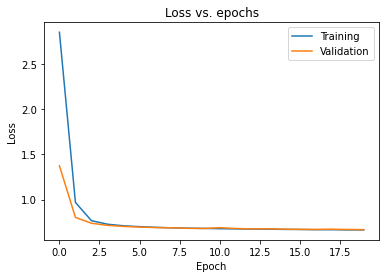

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.6626 - sparse_categorical_accuracy: 0.5991


0.5990907549858093

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.6657 - sparse_categorical_accuracy: 0.5953


0.5952861905097961

## Best 3-layer Adaptive GD

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.optimizers.Adagrad(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 3.2659 - sparse_categorical_accuracy: 0.1376 - val_loss: 2.2663 - val_sparse_categorical_accuracy: 0.4687 - 572ms/epoch - 8ms/step
Epoch 2/20
70/70 - 0s - loss: 1.6645 - sparse_categorical_accuracy: 0.5115 - val_loss: 1.2388 - val_sparse_categorical_accuracy: 0.5017 - 162ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.0499 - sparse_categorical_accuracy: 0.5357 - val_loss: 0.9264 - val_sparse_categorical_accuracy: 0.5246 - 138ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.8608 - sparse_categorical_accuracy: 0.5550 - val_loss: 0.8199 - val_sparse_categorical_accuracy: 0.5286 - 164ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.7869 - sparse_categorical_accuracy: 0.5564 - val_loss: 0.7707 - val_sparse_categorical_accuracy: 0.5394 - 133ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.7495 - sparse_categorical_accuracy: 0.5696 - val_loss: 0.7425 - val_sparse_categorical_accuracy: 0.5515 - 129ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.72

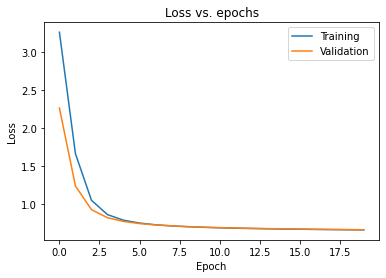

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.5187 - sparse_categorical_accuracy: 0.7540


0.7539989948272705

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4932 - sparse_categorical_accuracy: 0.7811


0.7811447978019714

## Best 3-layer RMSprop

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 0.9804 - sparse_categorical_accuracy: 0.5489 - val_loss: 0.6778 - val_sparse_categorical_accuracy: 0.5912 - 776ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6580 - sparse_categorical_accuracy: 0.6105 - val_loss: 0.6365 - val_sparse_categorical_accuracy: 0.6108 - 169ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.6206 - sparse_categorical_accuracy: 0.6405 - val_loss: 0.6069 - val_sparse_categorical_accuracy: 0.6660 - 182ms/epoch - 3ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5947 - sparse_categorical_accuracy: 0.6659 - val_loss: 0.5792 - val_sparse_categorical_accuracy: 0.6781 - 175ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5772 - sparse_categorical_accuracy: 0.6771 - val_loss: 0.6116 - val_sparse_categorical_accuracy: 0.6519 - 134ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5530 - sparse_categorical_accuracy: 0.6974 - val_loss: 0.6167 - val_sparse_categorical_accuracy: 0.6377 - 133ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5

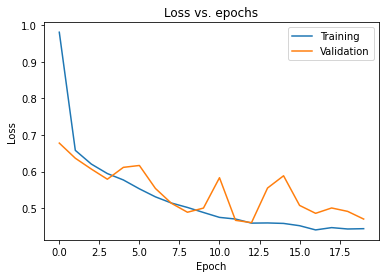

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4468 - sparse_categorical_accuracy: 0.8023


0.8023236393928528

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4374 - sparse_categorical_accuracy: 0.8054


0.8053871989250183

# Epochs

##20 epochs

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 0.9495 - sparse_categorical_accuracy: 0.5651 - val_loss: 0.6712 - val_sparse_categorical_accuracy: 0.5724 - 655ms/epoch - 9ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6500 - sparse_categorical_accuracy: 0.6006 - val_loss: 0.6301 - val_sparse_categorical_accuracy: 0.6438 - 181ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.6181 - sparse_categorical_accuracy: 0.6419 - val_loss: 0.6207 - val_sparse_categorical_accuracy: 0.6478 - 140ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5886 - sparse_categorical_accuracy: 0.6713 - val_loss: 0.6078 - val_sparse_categorical_accuracy: 0.6323 - 191ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5582 - sparse_categorical_accuracy: 0.6951 - val_loss: 0.5536 - val_sparse_categorical_accuracy: 0.6943 - 142ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5175 - sparse_categorical_accuracy: 0.7378 - val_loss: 0.5104 - val_sparse_categorical_accuracy: 0.7414 - 177ms/epoch - 3ms/step
Epoch 7/20
70/70 - 0s - loss: 0.48

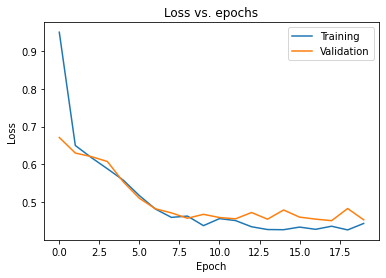

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4254 - sparse_categorical_accuracy: 0.8138


0.8137733340263367

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4071 - sparse_categorical_accuracy: 0.8182


0.8181818127632141

## 30 epochs

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=30,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/30
70/70 - 1s - loss: 1.3501 - sparse_categorical_accuracy: 0.5260 - val_loss: 0.6532 - val_sparse_categorical_accuracy: 0.6242 - 682ms/epoch - 10ms/step
Epoch 2/30
70/70 - 0s - loss: 0.6371 - sparse_categorical_accuracy: 0.6253 - val_loss: 0.6229 - val_sparse_categorical_accuracy: 0.6579 - 165ms/epoch - 2ms/step
Epoch 3/30
70/70 - 0s - loss: 0.6165 - sparse_categorical_accuracy: 0.6540 - val_loss: 0.5928 - val_sparse_categorical_accuracy: 0.6882 - 145ms/epoch - 2ms/step
Epoch 4/30
70/70 - 0s - loss: 0.5788 - sparse_categorical_accuracy: 0.6852 - val_loss: 0.5704 - val_sparse_categorical_accuracy: 0.6828 - 184ms/epoch - 3ms/step
Epoch 5/30
70/70 - 0s - loss: 0.5537 - sparse_categorical_accuracy: 0.7030 - val_loss: 0.5408 - val_sparse_categorical_accuracy: 0.7037 - 176ms/epoch - 3ms/step
Epoch 6/30
70/70 - 0s - loss: 0.5236 - sparse_categorical_accuracy: 0.7277 - val_loss: 0.5164 - val_sparse_categorical_accuracy: 0.7333 - 189ms/epoch - 3ms/step
Epoch 7/30
70/70 - 0s - loss: 0.4

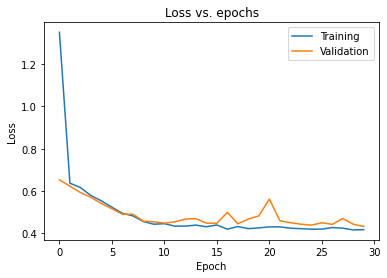

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4278 - sparse_categorical_accuracy: 0.8205


0.8205084800720215

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4266 - sparse_categorical_accuracy: 0.8189


0.8188552260398865

## 40 epochs

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=40,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/40
70/70 - 1s - loss: 1.8331 - sparse_categorical_accuracy: 0.5981 - val_loss: 0.5611 - val_sparse_categorical_accuracy: 0.7448 - 669ms/epoch - 10ms/step
Epoch 2/40
70/70 - 0s - loss: 0.5841 - sparse_categorical_accuracy: 0.7306 - val_loss: 0.5218 - val_sparse_categorical_accuracy: 0.7313 - 210ms/epoch - 3ms/step
Epoch 3/40
70/70 - 0s - loss: 0.5418 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.4905 - val_sparse_categorical_accuracy: 0.7832 - 158ms/epoch - 2ms/step
Epoch 4/40
70/70 - 0s - loss: 0.5071 - sparse_categorical_accuracy: 0.7652 - val_loss: 0.8427 - val_sparse_categorical_accuracy: 0.7071 - 148ms/epoch - 2ms/step
Epoch 5/40
70/70 - 0s - loss: 0.5999 - sparse_categorical_accuracy: 0.7497 - val_loss: 0.6190 - val_sparse_categorical_accuracy: 0.7771 - 197ms/epoch - 3ms/step
Epoch 6/40
70/70 - 0s - loss: 0.4989 - sparse_categorical_accuracy: 0.7753 - val_loss: 0.5436 - val_sparse_categorical_accuracy: 0.7104 - 184ms/epoch - 3ms/step
Epoch 7/40
70/70 - 0s - loss: 0.4

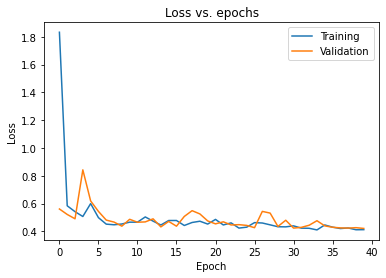

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 1s 3ms/step - loss: 0.4057 - sparse_categorical_accuracy: 0.8242


0.8242128491401672

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4076 - sparse_categorical_accuracy: 0.8189


0.8188552260398865

## 50 epochs

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=50,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/50
70/70 - 1s - loss: 1.2663 - sparse_categorical_accuracy: 0.5180 - val_loss: 0.6735 - val_sparse_categorical_accuracy: 0.5939 - 658ms/epoch - 9ms/step
Epoch 2/50
70/70 - 0s - loss: 0.6598 - sparse_categorical_accuracy: 0.6031 - val_loss: 0.6417 - val_sparse_categorical_accuracy: 0.6316 - 189ms/epoch - 3ms/step
Epoch 3/50
70/70 - 0s - loss: 0.6277 - sparse_categorical_accuracy: 0.6347 - val_loss: 0.6053 - val_sparse_categorical_accuracy: 0.6694 - 179ms/epoch - 3ms/step
Epoch 4/50
70/70 - 0s - loss: 0.5946 - sparse_categorical_accuracy: 0.6724 - val_loss: 0.5844 - val_sparse_categorical_accuracy: 0.6781 - 186ms/epoch - 3ms/step
Epoch 5/50
70/70 - 0s - loss: 0.5811 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.5565 - val_sparse_categorical_accuracy: 0.7057 - 151ms/epoch - 2ms/step
Epoch 6/50
70/70 - 0s - loss: 0.5420 - sparse_categorical_accuracy: 0.7153 - val_loss: 0.5452 - val_sparse_categorical_accuracy: 0.7347 - 152ms/epoch - 2ms/step
Epoch 7/50
70/70 - 0s - loss: 0.51

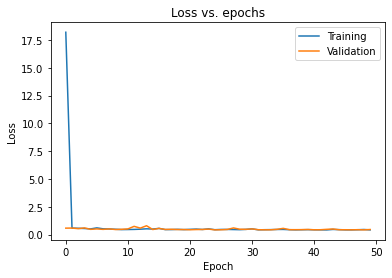

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4450 - sparse_categorical_accuracy: 0.8176


0.8176460862159729

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4500 - sparse_categorical_accuracy: 0.8128


0.8127946257591248

# Initializers

##With 1s

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
kernel_initializer=tf.constant_initializer(np.ones((15, 5939)))

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 8.0594 - sparse_categorical_accuracy: 0.5793 - val_loss: 0.6107 - val_sparse_categorical_accuracy: 0.7158 - 1s/epoch - 15ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6034 - sparse_categorical_accuracy: 0.7203 - val_loss: 0.5034 - val_sparse_categorical_accuracy: 0.7785 - 255ms/epoch - 4ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5487 - sparse_categorical_accuracy: 0.7499 - val_loss: 0.4826 - val_sparse_categorical_accuracy: 0.7906 - 221ms/epoch - 3ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5747 - sparse_categorical_accuracy: 0.7503 - val_loss: 0.4803 - val_sparse_categorical_accuracy: 0.7811 - 241ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5008 - sparse_categorical_accuracy: 0.7735 - val_loss: 0.5812 - val_sparse_categorical_accuracy: 0.7758 - 260ms/epoch - 4ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5251 - sparse_categorical_accuracy: 0.7656 - val_loss: 0.7495 - val_sparse_categorical_accuracy: 0.7340 - 265ms/epoch - 4ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5063

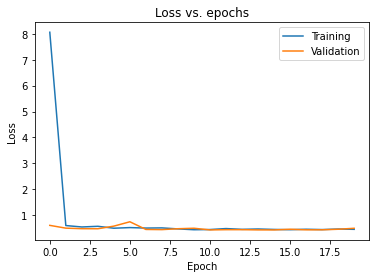

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4840 - sparse_categorical_accuracy: 0.8091


0.8090587854385376

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4835 - sparse_categorical_accuracy: 0.8074


0.8074073791503906

## With 0s

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
kernel_initializer=tf.constant_initializer(np.zeros((15, 5939)))

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 2s - loss: 15.6571 - sparse_categorical_accuracy: 0.5368 - val_loss: 0.5817 - val_sparse_categorical_accuracy: 0.7461 - 2s/epoch - 23ms/step
Epoch 2/20
70/70 - 0s - loss: 0.4989 - sparse_categorical_accuracy: 0.7806 - val_loss: 0.4954 - val_sparse_categorical_accuracy: 0.7764 - 353ms/epoch - 5ms/step
Epoch 3/20
70/70 - 0s - loss: 0.4988 - sparse_categorical_accuracy: 0.7784 - val_loss: 0.4611 - val_sparse_categorical_accuracy: 0.7973 - 362ms/epoch - 5ms/step
Epoch 4/20
70/70 - 0s - loss: 0.4965 - sparse_categorical_accuracy: 0.7705 - val_loss: 0.4920 - val_sparse_categorical_accuracy: 0.7993 - 400ms/epoch - 6ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5085 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.5832 - val_sparse_categorical_accuracy: 0.7737 - 338ms/epoch - 5ms/step
Epoch 6/20
70/70 - 0s - loss: 0.4881 - sparse_categorical_accuracy: 0.7849 - val_loss: 0.4548 - val_sparse_categorical_accuracy: 0.7825 - 346ms/epoch - 5ms/step
Epoch 7/20
70/70 - 0s - loss: 0.502

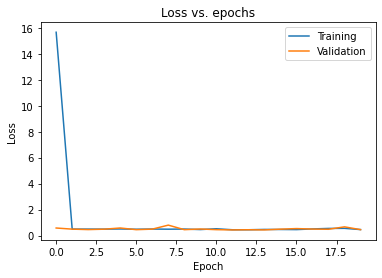

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 2ms/step - loss: 0.4426 - sparse_categorical_accuracy: 0.8163


0.8162990212440491

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4423 - sparse_categorical_accuracy: 0.8088


0.8087542057037354

## He Normal

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
kernel_initializer=tf.keras.initializers.HeNormal()

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 5.6088 - sparse_categorical_accuracy: 0.5934 - val_loss: 0.6690 - val_sparse_categorical_accuracy: 0.7098 - 706ms/epoch - 10ms/step
Epoch 2/20
70/70 - 0s - loss: 0.5405 - sparse_categorical_accuracy: 0.7454 - val_loss: 0.4838 - val_sparse_categorical_accuracy: 0.7771 - 190ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5120 - sparse_categorical_accuracy: 0.7649 - val_loss: 0.5810 - val_sparse_categorical_accuracy: 0.7643 - 198ms/epoch - 3ms/step
Epoch 4/20
70/70 - 0s - loss: 0.4715 - sparse_categorical_accuracy: 0.7869 - val_loss: 0.5124 - val_sparse_categorical_accuracy: 0.7818 - 156ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.4845 - sparse_categorical_accuracy: 0.7753 - val_loss: 0.4602 - val_sparse_categorical_accuracy: 0.7973 - 180ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.4846 - sparse_categorical_accuracy: 0.7829 - val_loss: 0.4685 - val_sparse_categorical_accuracy: 0.8047 - 153ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.4

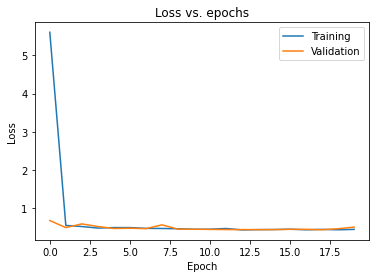

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4815 - sparse_categorical_accuracy: 0.8028


0.8028287887573242

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4849 - sparse_categorical_accuracy: 0.8007


0.8006734251976013

## Default

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 5.0094 - sparse_categorical_accuracy: 0.6370 - val_loss: 0.5701 - val_sparse_categorical_accuracy: 0.7481 - 1s/epoch - 16ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6030 - sparse_categorical_accuracy: 0.7425 - val_loss: 0.5035 - val_sparse_categorical_accuracy: 0.7852 - 243ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5377 - sparse_categorical_accuracy: 0.7647 - val_loss: 0.5357 - val_sparse_categorical_accuracy: 0.7178 - 250ms/epoch - 4ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5103 - sparse_categorical_accuracy: 0.7759 - val_loss: 0.9356 - val_sparse_categorical_accuracy: 0.5899 - 254ms/epoch - 4ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5707 - sparse_categorical_accuracy: 0.7602 - val_loss: 0.4615 - val_sparse_categorical_accuracy: 0.7980 - 254ms/epoch - 4ms/step
Epoch 6/20
70/70 - 0s - loss: 0.4876 - sparse_categorical_accuracy: 0.7793 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.7805 - 261ms/epoch - 4ms/step
Epoch 7/20
70/70 - 0s - loss: 0.4682

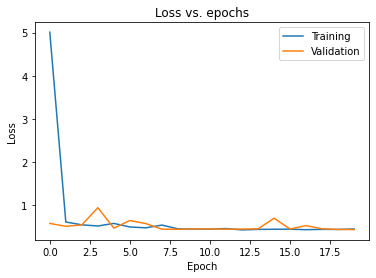

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.8195


0.8194982409477234

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.8148


0.8148148059844971

# Best Model

In [ ]:
model = Sequential([
                    Dense(16, activation = 'relu', input_shape = (15,)),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'sigmoid')
                   ])

In [ ]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
# fit the model with validation set

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,validation_split = 0.25)

Epoch 1/20
70/70 - 1s - loss: 5.0094 - sparse_categorical_accuracy: 0.6370 - val_loss: 0.5701 - val_sparse_categorical_accuracy: 0.7481 - 1s/epoch - 16ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6030 - sparse_categorical_accuracy: 0.7425 - val_loss: 0.5035 - val_sparse_categorical_accuracy: 0.7852 - 243ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5377 - sparse_categorical_accuracy: 0.7647 - val_loss: 0.5357 - val_sparse_categorical_accuracy: 0.7178 - 250ms/epoch - 4ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5103 - sparse_categorical_accuracy: 0.7759 - val_loss: 0.9356 - val_sparse_categorical_accuracy: 0.5899 - 254ms/epoch - 4ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5707 - sparse_categorical_accuracy: 0.7602 - val_loss: 0.4615 - val_sparse_categorical_accuracy: 0.7980 - 254ms/epoch - 4ms/step
Epoch 6/20
70/70 - 0s - loss: 0.4876 - sparse_categorical_accuracy: 0.7793 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.7805 - 261ms/epoch - 4ms/step
Epoch 7/20
70/70 - 0s - loss: 0.4682

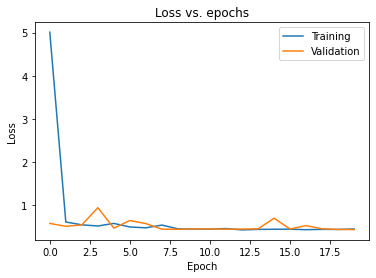

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_accuracy

186/186 [==============================] - 0s 1ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.8195


0.8194982409477234

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.8148


0.8148148059844971

In [ ]:
#Train metrics
y_pred = model.predict(x_train)
pred = tf.argmax(y_pred, axis=1)

print('Train Confusion Matrix:\n',confusion_matrix(pred,y_train))
print('Train Classification Report:\n',classification_report(pred,y_train))

Train Confusion Matrix:
 [[2429  543]
 [ 529 2438]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2972
           1       0.82      0.82      0.82      2967

    accuracy                           0.82      5939
   macro avg       0.82      0.82      0.82      5939
weighted avg       0.82      0.82      0.82      5939



In [ ]:
#Test Metrics
y_pred = model.predict(x_test)
pred = tf.argmax(y_pred, axis=1)

print('Test Confusion Matrix:\n',confusion_matrix(pred,y_test))
print('Test Classification Report:\n',classification_report(pred,y_test))

Test Confusion Matrix:
 [[611 132]
 [143 599]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       743
           1       0.82      0.81      0.81       742

    accuracy                           0.81      1485
   macro avg       0.81      0.81      0.81      1485
weighted avg       0.81      0.81      0.81      1485



#Using L2 regularization to handle overfit

In [125]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,
                                                 test_size=0.25,
                                                 random_state=42)

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.001)),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 0s - loss: 19.7836 - sparse_categorical_accuracy: 0.4960 - 442ms/epoch - 6ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6270 - sparse_categorical_accuracy: 0.7259 - 85ms/epoch - 1ms/step
Epoch 3/20
70/70 - 0s - loss: 0.4988 - sparse_categorical_accuracy: 0.7791 - 100ms/epoch - 1ms/step
Epoch 4/20
70/70 - 0s - loss: 0.4918 - sparse_categorical_accuracy: 0.7878 - 98ms/epoch - 1ms/step
Epoch 5/20
70/70 - 0s - loss: 0.4765 - sparse_categorical_accuracy: 0.7934 - 93ms/epoch - 1ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5077 - sparse_categorical_accuracy: 0.7795 - 87ms/epoch - 1ms/step
Epoch 7/20
70/70 - 0s - loss: 0.4915 - sparse_categorical_accuracy: 0.7847 - 96ms/epoch - 1ms/step
Epoch 8/20
70/70 - 0s - loss: 0.4990 - sparse_categorical_accuracy: 0.7777 - 89ms/epoch - 1ms/step
Epoch 9/20
70/70 - 0s - loss: 0.4792 - sparse_categorical_accuracy: 0.7903 - 86ms/epoch - 1ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5068 - sparse_categorical_accuracy: 0.7845 - 101ms/epoch - 1ms/step
Epoch

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4482 - sparse_categorical_accuracy: 0.8269


0.8269360065460205

Changing the penalty to 0.005

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.005)),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 0s - loss: 8.0932 - sparse_categorical_accuracy: 0.5945 - 470ms/epoch - 7ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6522 - sparse_categorical_accuracy: 0.7638 - 87ms/epoch - 1ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5814 - sparse_categorical_accuracy: 0.7620 - 96ms/epoch - 1ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5649 - sparse_categorical_accuracy: 0.7730 - 89ms/epoch - 1ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5661 - sparse_categorical_accuracy: 0.7714 - 91ms/epoch - 1ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6484 - sparse_categorical_accuracy: 0.7539 - 98ms/epoch - 1ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5945 - sparse_categorical_accuracy: 0.7631 - 87ms/epoch - 1ms/step
Epoch 8/20
70/70 - 0s - loss: 0.5355 - sparse_categorical_accuracy: 0.7703 - 102ms/epoch - 1ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5303 - sparse_categorical_accuracy: 0.7730 - 89ms/epoch - 1ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5317 - sparse_categorical_accuracy: 0.7771 - 106ms/epoch - 2ms/step
Epoch 

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.7853 - sparse_categorical_accuracy: 0.6108


0.6107743978500366

Changing the penalty to 0.0005

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 18.8798 - sparse_categorical_accuracy: 0.4915 - 1s/epoch - 20ms/step
Epoch 2/20
70/70 - 0s - loss: 0.7762 - sparse_categorical_accuracy: 0.7214 - 226ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5518 - sparse_categorical_accuracy: 0.7584 - 170ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.6088 - sparse_categorical_accuracy: 0.7537 - 158ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.4942 - sparse_categorical_accuracy: 0.7730 - 183ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5496 - sparse_categorical_accuracy: 0.7627 - 164ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5213 - sparse_categorical_accuracy: 0.7755 - 171ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.4801 - sparse_categorical_accuracy: 0.7806 - 199ms/epoch - 3ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5177 - sparse_categorical_accuracy: 0.7708 - 212ms/epoch - 3ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5340 - sparse_categorical_accuracy: 0.7773 - 187ms/epoch - 3ms/step


In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.3987 - sparse_categorical_accuracy: 0.8323


0.8323232531547546

Changing the penalty to 0.0003

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0003)),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 13.5635 - sparse_categorical_accuracy: 0.5564 - 749ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 0.5237 - sparse_categorical_accuracy: 0.7542 - 119ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.4781 - sparse_categorical_accuracy: 0.7757 - 120ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5417 - sparse_categorical_accuracy: 0.7638 - 142ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.4837 - sparse_categorical_accuracy: 0.7797 - 148ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.4833 - sparse_categorical_accuracy: 0.7771 - 147ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5135 - sparse_categorical_accuracy: 0.7717 - 137ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.4738 - sparse_categorical_accuracy: 0.7874 - 115ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5838 - sparse_categorical_accuracy: 0.7584 - 142ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.4758 - sparse_categorical_accuracy: 0.7833 - 143ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4913 - sparse_categorical_accuracy: 0.7993


0.7993265986442566

Changing the penalty to 0.0008

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0008)),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 13.7830 - sparse_categorical_accuracy: 0.6181 - 797ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 0.8078 - sparse_categorical_accuracy: 0.7364 - 150ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5098 - sparse_categorical_accuracy: 0.7768 - 142ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.4817 - sparse_categorical_accuracy: 0.7815 - 147ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5180 - sparse_categorical_accuracy: 0.7744 - 140ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5687 - sparse_categorical_accuracy: 0.7589 - 144ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.4891 - sparse_categorical_accuracy: 0.7874 - 135ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.4844 - sparse_categorical_accuracy: 0.7887 - 132ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.4691 - sparse_categorical_accuracy: 0.7885 - 133ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.4658 - sparse_categorical_accuracy: 0.7878 - 140ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4304 - sparse_categorical_accuracy: 0.8215


0.8215488195419312

#Dropout Regularization

Dropout rate = 0.5

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,)),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')]) 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 40.0594 - sparse_categorical_accuracy: 0.4499 - 779ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 6.8898 - sparse_categorical_accuracy: 0.6423 - 165ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.7661 - sparse_categorical_accuracy: 0.6686 - 149ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.8588 - sparse_categorical_accuracy: 0.6515 - 131ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.7178 - sparse_categorical_accuracy: 0.6753 - 142ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6480 - sparse_categorical_accuracy: 0.6803 - 126ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5933 - sparse_categorical_accuracy: 0.6980 - 148ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.6095 - sparse_categorical_accuracy: 0.7034 - 134ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5771 - sparse_categorical_accuracy: 0.7149 - 157ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5866 - sparse_categorical_accuracy: 0.7140 - 142ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4841 - sparse_categorical_accuracy: 0.8141


0.8141413927078247

Dropout rate = 0.25

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,)),
                    Dropout(0.25),
                    Dense(10, activation = 'softmax')]) 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 33.1619 - sparse_categorical_accuracy: 0.4982 - 750ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 10.1143 - sparse_categorical_accuracy: 0.6709 - 153ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 5.0213 - sparse_categorical_accuracy: 0.7133 - 156ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 2.2285 - sparse_categorical_accuracy: 0.7021 - 131ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 1.0510 - sparse_categorical_accuracy: 0.7142 - 174ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6865 - sparse_categorical_accuracy: 0.7319 - 134ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5665 - sparse_categorical_accuracy: 0.7434 - 151ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.5115 - sparse_categorical_accuracy: 0.7604 - 146ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5010 - sparse_categorical_accuracy: 0.7690 - 133ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.4856 - sparse_categorical_accuracy: 0.7757 - 164ms/epoch - 2ms/s

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4990 - sparse_categorical_accuracy: 0.6909


0.6909090876579285

Dropout rate = 0.6

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,)),
                    Dropout(0.6),
                    Dense(10, activation = 'softmax')]) 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 43.0296 - sparse_categorical_accuracy: 0.4158 - 741ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 6.7284 - sparse_categorical_accuracy: 0.5986 - 136ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.5279 - sparse_categorical_accuracy: 0.6208 - 139ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.8064 - sparse_categorical_accuracy: 0.6376 - 136ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6380 - sparse_categorical_accuracy: 0.6587 - 136ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6343 - sparse_categorical_accuracy: 0.6706 - 147ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.6093 - sparse_categorical_accuracy: 0.6861 - 154ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.6247 - sparse_categorical_accuracy: 0.6664 - 154ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.6076 - sparse_categorical_accuracy: 0.6942 - 153ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.6129 - sparse_categorical_accuracy: 0.6931 - 130ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4510 - sparse_categorical_accuracy: 0.7953


0.7952861785888672

Dropout rate = 0.8

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,)),
                    Dropout(0.8),
                    Dense(10, activation = 'softmax')]) 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 0s - loss: 52.4520 - sparse_categorical_accuracy: 0.3696 - 425ms/epoch - 6ms/step
Epoch 2/20
70/70 - 0s - loss: 5.7231 - sparse_categorical_accuracy: 0.5251 - 91ms/epoch - 1ms/step
Epoch 3/20
70/70 - 0s - loss: 1.4315 - sparse_categorical_accuracy: 0.5999 - 93ms/epoch - 1ms/step
Epoch 4/20
70/70 - 0s - loss: 1.0537 - sparse_categorical_accuracy: 0.6197 - 101ms/epoch - 1ms/step
Epoch 5/20
70/70 - 0s - loss: 0.9292 - sparse_categorical_accuracy: 0.6244 - 90ms/epoch - 1ms/step
Epoch 6/20
70/70 - 0s - loss: 0.8127 - sparse_categorical_accuracy: 0.6217 - 95ms/epoch - 1ms/step
Epoch 7/20
70/70 - 0s - loss: 0.7950 - sparse_categorical_accuracy: 0.6286 - 95ms/epoch - 1ms/step
Epoch 8/20
70/70 - 0s - loss: 0.7894 - sparse_categorical_accuracy: 0.6358 - 92ms/epoch - 1ms/step
Epoch 9/20
70/70 - 0s - loss: 0.7308 - sparse_categorical_accuracy: 0.6486 - 90ms/epoch - 1ms/step
Epoch 10/20
70/70 - 0s - loss: 0.7147 - sparse_categorical_accuracy: 0.6621 - 98ms/epoch - 1ms/step
Epoch 

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4608 - sparse_categorical_accuracy: 0.7933


0.7932659983634949

Dropout rate = 0.4

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,)),
                    Dropout(0.4),
                    Dense(10, activation = 'softmax')]) 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 34.3167 - sparse_categorical_accuracy: 0.4385 - 683ms/epoch - 10ms/step
Epoch 2/20
70/70 - 0s - loss: 6.5428 - sparse_categorical_accuracy: 0.6430 - 126ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.9133 - sparse_categorical_accuracy: 0.6529 - 149ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.8069 - sparse_categorical_accuracy: 0.6956 - 142ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6629 - sparse_categorical_accuracy: 0.7084 - 128ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5779 - sparse_categorical_accuracy: 0.7330 - 140ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5620 - sparse_categorical_accuracy: 0.7360 - 128ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.5296 - sparse_categorical_accuracy: 0.7452 - 147ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5332 - sparse_categorical_accuracy: 0.7418 - 136ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5227 - sparse_categorical_accuracy: 0.7548 - 156ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4158 - sparse_categorical_accuracy: 0.8135


0.8134680390357971

#Using both L2 regularization and dropout

penalty = 0.001 Dropout = 0.5

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.001)),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 28.1832 - sparse_categorical_accuracy: 0.4827 - 762ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 4.1076 - sparse_categorical_accuracy: 0.6367 - 150ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.0877 - sparse_categorical_accuracy: 0.6711 - 152ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.7010 - sparse_categorical_accuracy: 0.7016 - 112ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6258 - sparse_categorical_accuracy: 0.7326 - 147ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.6068 - sparse_categorical_accuracy: 0.7261 - 153ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5808 - sparse_categorical_accuracy: 0.7355 - 141ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.5824 - sparse_categorical_accuracy: 0.7353 - 141ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5718 - sparse_categorical_accuracy: 0.7405 - 139ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5696 - sparse_categorical_accuracy: 0.7454 - 142ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 3ms/step - loss: 0.4493 - sparse_categorical_accuracy: 0.8189


0.8188552260398865

penalty = 0.0005 Dropout = 0.5

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 2s - loss: 35.0940 - sparse_categorical_accuracy: 0.4466 - 2s/epoch - 24ms/step
Epoch 2/20
70/70 - 0s - loss: 4.6627 - sparse_categorical_accuracy: 0.6356 - 209ms/epoch - 3ms/step
Epoch 3/20
70/70 - 0s - loss: 1.2300 - sparse_categorical_accuracy: 0.6646 - 237ms/epoch - 3ms/step
Epoch 4/20
70/70 - 0s - loss: 0.7512 - sparse_categorical_accuracy: 0.6796 - 187ms/epoch - 3ms/step
Epoch 5/20
70/70 - 0s - loss: 0.7425 - sparse_categorical_accuracy: 0.6870 - 179ms/epoch - 3ms/step
Epoch 6/20
70/70 - 0s - loss: 0.7070 - sparse_categorical_accuracy: 0.6837 - 192ms/epoch - 3ms/step
Epoch 7/20
70/70 - 0s - loss: 0.7274 - sparse_categorical_accuracy: 0.6949 - 154ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.6537 - sparse_categorical_accuracy: 0.7104 - 246ms/epoch - 4ms/step
Epoch 9/20
70/70 - 0s - loss: 0.6446 - sparse_categorical_accuracy: 0.7149 - 232ms/epoch - 3ms/step
Epoch 10/20
70/70 - 0s - loss: 0.6404 - sparse_categorical_accuracy: 0.7164 - 208ms/epoch - 3ms/step


In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4482 - sparse_categorical_accuracy: 0.8175


0.8175083994865417

penalty = 0.0007 Dropout = 0.4

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
                    Dropout(0.4),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 38.3923 - sparse_categorical_accuracy: 0.4189 - 1s/epoch - 18ms/step
Epoch 2/20
70/70 - 0s - loss: 6.2632 - sparse_categorical_accuracy: 0.6300 - 136ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.5114 - sparse_categorical_accuracy: 0.6639 - 140ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.7153 - sparse_categorical_accuracy: 0.6816 - 134ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6341 - sparse_categorical_accuracy: 0.6962 - 127ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5896 - sparse_categorical_accuracy: 0.7162 - 170ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5840 - sparse_categorical_accuracy: 0.7243 - 141ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.5817 - sparse_categorical_accuracy: 0.7241 - 126ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5705 - sparse_categorical_accuracy: 0.7369 - 138ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5582 - sparse_categorical_accuracy: 0.7447 - 176ms/epoch - 3ms/step


In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.4888 - sparse_categorical_accuracy: 0.7731


0.7730639576911926

penalty = 0.0005 Dropout = 0.3

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
                    Dropout(0.3),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 20.3733 - sparse_categorical_accuracy: 0.5680 - 777ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 5.1332 - sparse_categorical_accuracy: 0.6816 - 171ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.6410 - sparse_categorical_accuracy: 0.7128 - 137ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 0.6862 - sparse_categorical_accuracy: 0.7400 - 131ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.6236 - sparse_categorical_accuracy: 0.7220 - 127ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5586 - sparse_categorical_accuracy: 0.7515 - 123ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5337 - sparse_categorical_accuracy: 0.7591 - 135ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.5310 - sparse_categorical_accuracy: 0.7618 - 125ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.5296 - sparse_categorical_accuracy: 0.7499 - 150ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.5135 - sparse_categorical_accuracy: 0.7703 - 156ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4243 - sparse_categorical_accuracy: 0.8141


0.8141413927078247

penalty = 0.0005 Dropout = 0.7

In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,),kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
                    Dropout(0.7),
                    Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(0.001))])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2)

Epoch 1/20
70/70 - 1s - loss: 83.4936 - sparse_categorical_accuracy: 0.2663 - 783ms/epoch - 11ms/step
Epoch 2/20
70/70 - 0s - loss: 7.2693 - sparse_categorical_accuracy: 0.5137 - 122ms/epoch - 2ms/step
Epoch 3/20
70/70 - 0s - loss: 1.6790 - sparse_categorical_accuracy: 0.6091 - 155ms/epoch - 2ms/step
Epoch 4/20
70/70 - 0s - loss: 1.1263 - sparse_categorical_accuracy: 0.6147 - 139ms/epoch - 2ms/step
Epoch 5/20
70/70 - 0s - loss: 0.9006 - sparse_categorical_accuracy: 0.6466 - 133ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.9042 - sparse_categorical_accuracy: 0.6551 - 147ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.7483 - sparse_categorical_accuracy: 0.6605 - 161ms/epoch - 2ms/step
Epoch 8/20
70/70 - 0s - loss: 0.7466 - sparse_categorical_accuracy: 0.6736 - 130ms/epoch - 2ms/step
Epoch 9/20
70/70 - 0s - loss: 0.7151 - sparse_categorical_accuracy: 0.6715 - 121ms/epoch - 2ms/step
Epoch 10/20
70/70 - 0s - loss: 0.6748 - sparse_categorical_accuracy: 0.6805 - 148ms/epoch - 2ms/st

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4542 - sparse_categorical_accuracy: 0.8229


0.8228956460952759

#Standard Batch Normalization

In [117]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 2
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, batch_size=64,verbose=2)

Epoch 1/100
70/70 - 2s - loss: 0.1387 - accuracy: 0.8096 - 2s/epoch - 22ms/step
Epoch 2/100
70/70 - 0s - loss: 0.1367 - accuracy: 0.8101 - 208ms/epoch - 3ms/step
Epoch 3/100
70/70 - 0s - loss: 0.1376 - accuracy: 0.8125 - 242ms/epoch - 3ms/step
Epoch 4/100
70/70 - 0s - loss: 0.1396 - accuracy: 0.8071 - 217ms/epoch - 3ms/step
Epoch 5/100
70/70 - 0s - loss: 0.1378 - accuracy: 0.8134 - 241ms/epoch - 3ms/step
Epoch 6/100
70/70 - 0s - loss: 0.1365 - accuracy: 0.8116 - 209ms/epoch - 3ms/step
Epoch 7/100
70/70 - 0s - loss: 0.1384 - accuracy: 0.8094 - 202ms/epoch - 3ms/step
Epoch 8/100
70/70 - 0s - loss: 0.1383 - accuracy: 0.8143 - 225ms/epoch - 3ms/step
Epoch 9/100
70/70 - 0s - loss: 0.1396 - accuracy: 0.8112 - 213ms/epoch - 3ms/step
Epoch 10/100
70/70 - 0s - loss: 0.1377 - accuracy: 0.8139 - 226ms/epoch - 3ms/step
Epoch 11/100
70/70 - 0s - loss: 0.1367 - accuracy: 0.8112 - 168ms/epoch - 2ms/step
Epoch 12/100
70/70 - 0s - loss: 0.1386 - accuracy: 0.8094 - 210ms/epoch - 3ms/step
Epoch 13/100
70

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.8377


0.837710440158844

Batch Normalization custom model 1

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, batch_size=64,verbose=2)

Epoch 1/100
70/70 - 2s - loss: 0.5242 - accuracy: 0.6071 - 2s/epoch - 22ms/step
Epoch 2/100
70/70 - 0s - loss: 0.2938 - accuracy: 0.6504 - 207ms/epoch - 3ms/step
Epoch 3/100
70/70 - 0s - loss: 0.2508 - accuracy: 0.6810 - 229ms/epoch - 3ms/step
Epoch 4/100
70/70 - 0s - loss: 0.2263 - accuracy: 0.7036 - 205ms/epoch - 3ms/step
Epoch 5/100
70/70 - 0s - loss: 0.2066 - accuracy: 0.7272 - 242ms/epoch - 3ms/step
Epoch 6/100
70/70 - 0s - loss: 0.1970 - accuracy: 0.7339 - 222ms/epoch - 3ms/step
Epoch 7/100
70/70 - 0s - loss: 0.1898 - accuracy: 0.7441 - 208ms/epoch - 3ms/step
Epoch 8/100
70/70 - 0s - loss: 0.1894 - accuracy: 0.7499 - 209ms/epoch - 3ms/step
Epoch 9/100
70/70 - 0s - loss: 0.1823 - accuracy: 0.7510 - 218ms/epoch - 3ms/step
Epoch 10/100
70/70 - 0s - loss: 0.1781 - accuracy: 0.7678 - 199ms/epoch - 3ms/step
Epoch 11/100
70/70 - 0s - loss: 0.1707 - accuracy: 0.7710 - 205ms/epoch - 3ms/step
Epoch 12/100
70/70 - 0s - loss: 0.1706 - accuracy: 0.7694 - 190ms/epoch - 3ms/step
Epoch 13/100
70

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.8370


0.8370370268821716

Batch Normalization custom model 2

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.90, # default is 0.99
    epsilon=0.003, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.7) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 2s - loss: 0.4523 - accuracy: 0.6283 - val_loss: 0.5121 - val_accuracy: 0.6323 - 2s/epoch - 30ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2606 - accuracy: 0.6719 - val_loss: 0.1867 - val_accuracy: 0.7324 - 244ms/epoch - 4ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2328 - accuracy: 0.7030 - val_loss: 0.1581 - val_accuracy: 0.7698 - 267ms/epoch - 4ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2153 - accuracy: 0.7178 - val_loss: 0.1620 - val_accuracy: 0.7728 - 270ms/epoch - 5ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2090 - accuracy: 0.7247 - val_loss: 0.1622 - val_accuracy: 0.7608 - 246ms/epoch - 4ms/step
Epoch 6/100
60/60 - 0s - loss: 0.1977 - accuracy: 0.7435 - val_loss: 0.1590 - val_accuracy: 0.7728 - 243ms/epoch - 4ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1891 - accuracy: 0.7445 - val_loss: 0.1554 - val_accuracy: 0.7683 - 249ms/epoch - 4ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1821 - accuracy: 0.7540 - val_loss: 0.1622 - val_accuracy: 0.7728 - 257ms/epoch - 4ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.8330


0.8329966068267822

Batch Normalization custom model 3

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.003, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.7) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.5373 - accuracy: 0.6124 - val_loss: 0.2511 - val_accuracy: 0.5471 - 1s/epoch - 18ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2779 - accuracy: 0.6616 - val_loss: 0.1666 - val_accuracy: 0.7638 - 154ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2494 - accuracy: 0.6814 - val_loss: 0.1638 - val_accuracy: 0.7668 - 158ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2281 - accuracy: 0.7062 - val_loss: 0.1579 - val_accuracy: 0.7833 - 159ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2103 - accuracy: 0.7178 - val_loss: 0.1552 - val_accuracy: 0.7713 - 156ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2008 - accuracy: 0.7260 - val_loss: 0.1709 - val_accuracy: 0.7833 - 159ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1888 - accuracy: 0.7406 - val_loss: 0.1608 - val_accuracy: 0.7743 - 163ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1867 - accuracy: 0.7395 - val_loss: 0.1712 - val_accuracy: 0.7773 - 168ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.8343


0.834343433380127

Batch Normalization custom model 4

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.003, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.5539 - accuracy: 0.6029 - val_loss: 0.3244 - val_accuracy: 0.5321 - 1s/epoch - 17ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3249 - accuracy: 0.6679 - val_loss: 0.3010 - val_accuracy: 0.5635 - 148ms/epoch - 2ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2807 - accuracy: 0.6631 - val_loss: 0.1848 - val_accuracy: 0.7414 - 167ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2410 - accuracy: 0.6919 - val_loss: 0.1662 - val_accuracy: 0.7564 - 154ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2317 - accuracy: 0.6980 - val_loss: 0.1746 - val_accuracy: 0.7638 - 169ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2295 - accuracy: 0.7065 - val_loss: 0.1729 - val_accuracy: 0.7803 - 166ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2084 - accuracy: 0.7300 - val_loss: 0.1658 - val_accuracy: 0.7758 - 161ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.2131 - accuracy: 0.7239 - val_loss: 0.1702 - val_accuracy: 0.7818 - 149ms/epoch - 2ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.8364


0.8363636136054993

#Batch Normalization and Dropout rate

Batch Normalization custom model and Dropout rate = 0.5

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.003, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 2s - loss: 0.9783 - accuracy: 0.5894 - val_loss: 0.4091 - val_accuracy: 0.3767 - 2s/epoch - 27ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3532 - accuracy: 0.6386 - val_loss: 0.2491 - val_accuracy: 0.5859 - 166ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.3133 - accuracy: 0.6526 - val_loss: 0.1854 - val_accuracy: 0.7743 - 149ms/epoch - 2ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2828 - accuracy: 0.6666 - val_loss: 0.1646 - val_accuracy: 0.7758 - 153ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2613 - accuracy: 0.6822 - val_loss: 0.1920 - val_accuracy: 0.7399 - 172ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2330 - accuracy: 0.7094 - val_loss: 0.1742 - val_accuracy: 0.7668 - 149ms/epoch - 2ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2286 - accuracy: 0.7046 - val_loss: 0.1746 - val_accuracy: 0.7668 - 164ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.2252 - accuracy: 0.7107 - val_loss: 0.1572 - val_accuracy: 0.7803 - 154ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.8303


0.8303030133247375

Batch Normalization custom model and Dropout rate = 0.4

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.4),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.5798 - accuracy: 0.6040 - val_loss: 0.2595 - val_accuracy: 0.6353 - 1s/epoch - 19ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2913 - accuracy: 0.6613 - val_loss: 0.2011 - val_accuracy: 0.7235 - 180ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2746 - accuracy: 0.6856 - val_loss: 0.1918 - val_accuracy: 0.7653 - 180ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2596 - accuracy: 0.6904 - val_loss: 0.1704 - val_accuracy: 0.7773 - 180ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2368 - accuracy: 0.6967 - val_loss: 0.1680 - val_accuracy: 0.7668 - 150ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2231 - accuracy: 0.7215 - val_loss: 0.1607 - val_accuracy: 0.7773 - 161ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2060 - accuracy: 0.7324 - val_loss: 0.1690 - val_accuracy: 0.7758 - 171ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1954 - accuracy: 0.7485 - val_loss: 0.1552 - val_accuracy: 0.7713 - 152ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.8418


0.8417508602142334

Batch Normalization custom model and Dropout rate = 0.4

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.4),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.90, # default is 0.99
    epsilon=0.002, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.5372 - accuracy: 0.6114 - val_loss: 0.2378 - val_accuracy: 0.6248 - 1s/epoch - 18ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3046 - accuracy: 0.6658 - val_loss: 0.1797 - val_accuracy: 0.7100 - 153ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2423 - accuracy: 0.6975 - val_loss: 0.1607 - val_accuracy: 0.7743 - 151ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2238 - accuracy: 0.7149 - val_loss: 0.1745 - val_accuracy: 0.7593 - 158ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2062 - accuracy: 0.7355 - val_loss: 0.1738 - val_accuracy: 0.7683 - 153ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.1973 - accuracy: 0.7427 - val_loss: 0.1774 - val_accuracy: 0.7608 - 158ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1890 - accuracy: 0.7506 - val_loss: 0.1538 - val_accuracy: 0.7758 - 162ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1859 - accuracy: 0.7551 - val_loss: 0.1587 - val_accuracy: 0.7713 - 152ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.8377


0.837710440158844

Batch Normalization custom model and Dropout rate = 0.3

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.3),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.7) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.3898 - accuracy: 0.6449 - val_loss: 0.2016 - val_accuracy: 0.6906 - 1s/epoch - 18ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2278 - accuracy: 0.7096 - val_loss: 0.1622 - val_accuracy: 0.7713 - 149ms/epoch - 2ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2103 - accuracy: 0.7318 - val_loss: 0.2367 - val_accuracy: 0.6143 - 153ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2019 - accuracy: 0.7361 - val_loss: 0.1644 - val_accuracy: 0.7803 - 166ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.1875 - accuracy: 0.7569 - val_loss: 0.1543 - val_accuracy: 0.7713 - 158ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.1834 - accuracy: 0.7554 - val_loss: 0.1661 - val_accuracy: 0.7698 - 146ms/epoch - 2ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1743 - accuracy: 0.7712 - val_loss: 0.1487 - val_accuracy: 0.7818 - 154ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1711 - accuracy: 0.7754 - val_loss: 0.1580 - val_accuracy: 0.7862 - 165ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.8323


0.8323232531547546

Batch Normalization custom model and Dropout rate = 0.

In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.003, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 2s - loss: 0.8825 - accuracy: 0.5709 - val_loss: 0.4167 - val_accuracy: 0.4245 - 2s/epoch - 31ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3443 - accuracy: 0.6328 - val_loss: 0.1851 - val_accuracy: 0.7309 - 300ms/epoch - 5ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2922 - accuracy: 0.6505 - val_loss: 0.1713 - val_accuracy: 0.7564 - 234ms/epoch - 4ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2611 - accuracy: 0.6737 - val_loss: 0.1654 - val_accuracy: 0.7593 - 299ms/epoch - 5ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2539 - accuracy: 0.6769 - val_loss: 0.1785 - val_accuracy: 0.7459 - 298ms/epoch - 5ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2296 - accuracy: 0.7141 - val_loss: 0.1719 - val_accuracy: 0.7623 - 242ms/epoch - 4ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2146 - accuracy: 0.7266 - val_loss: 0.1675 - val_accuracy: 0.7578 - 246ms/epoch - 4ms/step
Epoch 8/100
60/60 - 0s - loss: 0.2080 - accuracy: 0.7199 - val_loss: 0.1664 - val_accuracy: 0.7638 - 229ms/epoch - 4ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.8370


0.8370370268821716

#Batch normalization , L2 regularization , Dropout

Batch Normalization custom model and Dropout rate = 0.5 Penalty = 0.0005


In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.85, # default is 0.99
    epsilon=0.002, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.6121 - accuracy: 0.6016 - val_loss: 0.4139 - val_accuracy: 0.5755 - 1s/epoch - 21ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3162 - accuracy: 0.6618 - val_loss: 0.2446 - val_accuracy: 0.6293 - 158ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2760 - accuracy: 0.6811 - val_loss: 0.1944 - val_accuracy: 0.7474 - 187ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2466 - accuracy: 0.6985 - val_loss: 0.1833 - val_accuracy: 0.7459 - 171ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2225 - accuracy: 0.7186 - val_loss: 0.2129 - val_accuracy: 0.7205 - 167ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2297 - accuracy: 0.7168 - val_loss: 0.1954 - val_accuracy: 0.7339 - 155ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2108 - accuracy: 0.7353 - val_loss: 0.9706 - val_accuracy: 0.5082 - 152ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.2083 - accuracy: 0.7403 - val_loss: 0.1908 - val_accuracy: 0.7564 - 160ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.8189


0.8188552260398865

Batch Normalization custom model and Dropout rate = 0.4 Penalty = 0.0005


In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.4),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.5327 - accuracy: 0.6177 - val_loss: 0.2761 - val_accuracy: 0.6009 - 1s/epoch - 18ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2946 - accuracy: 0.6661 - val_loss: 0.1897 - val_accuracy: 0.7623 - 159ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2606 - accuracy: 0.7015 - val_loss: 0.1863 - val_accuracy: 0.7788 - 176ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2301 - accuracy: 0.7162 - val_loss: 0.1632 - val_accuracy: 0.7952 - 154ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2114 - accuracy: 0.7392 - val_loss: 0.1712 - val_accuracy: 0.7773 - 164ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2045 - accuracy: 0.7466 - val_loss: 0.1641 - val_accuracy: 0.7818 - 162ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1937 - accuracy: 0.7480 - val_loss: 0.1606 - val_accuracy: 0.7952 - 151ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1890 - accuracy: 0.7601 - val_loss: 0.1738 - val_accuracy: 0.7788 - 167ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.8397


0.8397306203842163

Batch Normalization custom model and Dropout rate = 0.4 Penalty = 0.0005


In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.4),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.90, # default is 0.99
    epsilon=0.002, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.7) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 2s - loss: 0.4958 - accuracy: 0.6254 - val_loss: 0.3318 - val_accuracy: 0.6517 - 2s/epoch - 25ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2647 - accuracy: 0.6882 - val_loss: 0.1954 - val_accuracy: 0.7324 - 155ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2386 - accuracy: 0.7118 - val_loss: 0.1839 - val_accuracy: 0.7534 - 165ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2247 - accuracy: 0.7131 - val_loss: 0.1780 - val_accuracy: 0.7713 - 151ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2058 - accuracy: 0.7384 - val_loss: 0.2264 - val_accuracy: 0.6562 - 162ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.1995 - accuracy: 0.7493 - val_loss: 0.1893 - val_accuracy: 0.7578 - 181ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1879 - accuracy: 0.7530 - val_loss: 0.2057 - val_accuracy: 0.7519 - 150ms/epoch - 2ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1860 - accuracy: 0.7667 - val_loss: 0.1631 - val_accuracy: 0.7818 - 165ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.8263


0.8262626528739929

Batch Normalization custom model and Dropout rate = 0.3 Penalty = 0.0007


In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.0007)),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.3),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.7) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.4431 - accuracy: 0.6531 - val_loss: 0.3082 - val_accuracy: 0.6502 - 1s/epoch - 20ms/step
Epoch 2/100
60/60 - 0s - loss: 0.2434 - accuracy: 0.7081 - val_loss: 0.1857 - val_accuracy: 0.7803 - 175ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2289 - accuracy: 0.7128 - val_loss: 0.1823 - val_accuracy: 0.7549 - 160ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2063 - accuracy: 0.7363 - val_loss: 0.1926 - val_accuracy: 0.7713 - 161ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.1984 - accuracy: 0.7554 - val_loss: 0.1663 - val_accuracy: 0.7743 - 156ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.1939 - accuracy: 0.7511 - val_loss: 0.1637 - val_accuracy: 0.7773 - 166ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.1820 - accuracy: 0.7757 - val_loss: 0.1612 - val_accuracy: 0.7833 - 163ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.1812 - accuracy: 0.7699 - val_loss: 0.1759 - val_accuracy: 0.7892 - 168ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.8128


0.8127946257591248

Batch Normalization custom model and Dropout rate = 0.5 Penalty = 0.0005


In [ ]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [ ]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.003, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [ ]:
# Add the output layer

model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
60/60 - 1s - loss: 0.6080 - accuracy: 0.5952 - val_loss: 0.2708 - val_accuracy: 0.6607 - 1s/epoch - 19ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3161 - accuracy: 0.6573 - val_loss: 0.2225 - val_accuracy: 0.7414 - 177ms/epoch - 3ms/step
Epoch 3/100
60/60 - 0s - loss: 0.2966 - accuracy: 0.6705 - val_loss: 0.1897 - val_accuracy: 0.7564 - 162ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.2623 - accuracy: 0.6838 - val_loss: 0.1861 - val_accuracy: 0.7429 - 215ms/epoch - 4ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2406 - accuracy: 0.6930 - val_loss: 0.1856 - val_accuracy: 0.7384 - 161ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2288 - accuracy: 0.7104 - val_loss: 0.1813 - val_accuracy: 0.7414 - 155ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2151 - accuracy: 0.7213 - val_loss: 0.2067 - val_accuracy: 0.7130 - 169ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.2127 - accuracy: 0.7316 - val_loss: 0.2102 - val_accuracy: 0.7414 - 169ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.8182


0.8181818127632141

# Reduce Overfit - Early Stopping 

In [142]:
#set early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss',min_delta=0.02,patience=5) 

In [143]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (15,)),
                    Dense(10, activation = 'softmax')])

In [144]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              loss='sparse_categorical_crossentropy', #Use this loss function when y labels are integers
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]) #use this accuracy when ylabels are integers

In [145]:
# fit the model with validation set and earlystopping

history = model.fit(x_train, y_train, epochs=20,batch_size=64, verbose = 2,callbacks=[early_stopping])

Epoch 1/20
70/70 - 0s - loss: 1.0264 - sparse_categorical_accuracy: 0.5094 - 414ms/epoch - 6ms/step
Epoch 2/20
70/70 - 0s - loss: 0.6197 - sparse_categorical_accuracy: 0.6502 - 103ms/epoch - 1ms/step
Epoch 3/20
70/70 - 0s - loss: 0.5853 - sparse_categorical_accuracy: 0.6780 - 93ms/epoch - 1ms/step
Epoch 4/20
70/70 - 0s - loss: 0.5593 - sparse_categorical_accuracy: 0.7023 - 104ms/epoch - 1ms/step
Epoch 5/20
70/70 - 0s - loss: 0.5369 - sparse_categorical_accuracy: 0.7319 - 106ms/epoch - 2ms/step
Epoch 6/20
70/70 - 0s - loss: 0.5189 - sparse_categorical_accuracy: 0.7384 - 106ms/epoch - 2ms/step
Epoch 7/20
70/70 - 0s - loss: 0.5128 - sparse_categorical_accuracy: 0.7423 - 95ms/epoch - 1ms/step
Epoch 8/20
70/70 - 0s - loss: 0.4881 - sparse_categorical_accuracy: 0.7782 - 104ms/epoch - 1ms/step
Epoch 9/20
70/70 - 0s - loss: 0.4761 - sparse_categorical_accuracy: 0.7818 - 90ms/epoch - 1ms/step
Epoch 10/20
70/70 - 0s - loss: 0.4643 - sparse_categorical_accuracy: 0.7934 - 90ms/epoch - 1ms/step
Epo

In [146]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 1ms/step - loss: 0.4361 - sparse_categorical_accuracy: 0.8249


0.8249158263206482

#Early stopping, L2 regularization, Dropout regularization, Batch Normalization

In [154]:
#set early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss',min_delta=0.02,patience=5) 

In [155]:
model = Sequential([
    Dense(64, input_shape=[x_train.shape[1],], activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.00005)),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [156]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.07), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [157]:
# Add the output layer

model.add(Dense(1))

In [158]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [159]:
# Train the model

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=2,callbacks=[early_stopping])

Epoch 1/100
60/60 - 2s - loss: 0.6217 - accuracy: 0.5266 - val_loss: 0.3634 - val_accuracy: 0.5007 - 2s/epoch - 28ms/step
Epoch 2/100
60/60 - 0s - loss: 0.3823 - accuracy: 0.5651 - val_loss: 0.2600 - val_accuracy: 0.5845 - 150ms/epoch - 2ms/step
Epoch 3/100
60/60 - 0s - loss: 0.3304 - accuracy: 0.5678 - val_loss: 0.2278 - val_accuracy: 0.6472 - 155ms/epoch - 3ms/step
Epoch 4/100
60/60 - 0s - loss: 0.3239 - accuracy: 0.5694 - val_loss: 0.2266 - val_accuracy: 0.6502 - 159ms/epoch - 3ms/step
Epoch 5/100
60/60 - 0s - loss: 0.2936 - accuracy: 0.5823 - val_loss: 0.2405 - val_accuracy: 0.6009 - 179ms/epoch - 3ms/step
Epoch 6/100
60/60 - 0s - loss: 0.2812 - accuracy: 0.5900 - val_loss: 0.2178 - val_accuracy: 0.6398 - 172ms/epoch - 3ms/step
Epoch 7/100
60/60 - 0s - loss: 0.2687 - accuracy: 0.6013 - val_loss: 0.2137 - val_accuracy: 0.6652 - 155ms/epoch - 3ms/step
Epoch 8/100
60/60 - 0s - loss: 0.2774 - accuracy: 0.5826 - val_loss: 0.2154 - val_accuracy: 0.6577 - 169ms/epoch - 3ms/step
Epoch 9/10

In [160]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
valid_accuracy

47/47 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.8034


0.803367018699646